In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)


In [ ]:
#Chemin vers les fichiers
TRAIN_PATH = 'Train.csv'
TEST_PATH = 'Test.csv'
SUB_PATH = 'SampleSubmission.csv'

In [ ]:
#Read the files
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
submission = pd.read_csv(SUB_PATH)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7876 entries, 0 to 7875
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          7876 non-null   int64  
 1   Order Status      7876 non-null   object 
 2   Category Name     5273 non-null   object 
 3   Product Name      7876 non-null   object 
 4   Quantity          7876 non-null   int64  
 5   Unit Price        7876 non-null   object 
 6   Total Price       7876 non-null   object 
 7   Sub Total         7811 non-null   object 
 8   Delivery Charge   7876 non-null   object 
 9   Payment Method    7876 non-null   object 
 10  Customer ID       7799 non-null   float64
 11  Merchant          7875 non-null   float64
 12  Order Time        7875 non-null   object 
 13  Customer Country  7875 non-null   object 
 14  Purchase Again    7875 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 923.1+ KB


In [ ]:
#A fonction for resume tables

def resume_table(data):
    #print(f'Data Shape: {data.shape}')
    summary = (pd
               .DataFrame(data.dtypes, columns=['dtypes'])
               .reset_index()
               .rename(columns={'index': 'name'}))
    summary.loc[:, 'missing'] = data.isna().sum().values
    summary.loc[:, '%missing'] = np.round(summary.missing / data.shape[0] * 100, 2)
    summary.loc[:, 'uniques'] = data.nunique().values
    return summary, data.shape

In [ ]:
resume_table(train)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00      895
 1       Order Status   object        0      0.00        5
 2      Category Name   object     2603     33.05      106
 3       Product Name   object        0      0.00     1821
 4           Quantity    int64        0      0.00       25
 5         Unit Price   object        0      0.00      342
 6        Total Price   object        0      0.00      513
 7          Sub Total   object       65      0.83      499
 8    Delivery Charge   object        0      0.00       67
 9     Payment Method   object        0      0.00        3
 10       Customer ID  float64       77      0.98      488
 11          Merchant  float64        1      0.01       46
 12        Order Time   object        1      0.01      891
 13  Customer Country   object        1      0.01        5
 14    Purchase Again  float64        1      0.01        2, (7876, 15))

In [ ]:
#Remove rows and columns with Null/NaN values
train=train.dropna(subset=['Customer ID'])

In [ ]:
resume_table(train)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00      892
 1       Order Status   object        0      0.00        5
 2      Category Name   object     2542     32.59      106
 3       Product Name   object        0      0.00     1810
 4           Quantity    int64        0      0.00       25
 5         Unit Price   object        0      0.00      342
 6        Total Price   object        0      0.00      513
 7          Sub Total   object       65      0.83      496
 8    Delivery Charge   object        0      0.00       67
 9     Payment Method   object        0      0.00        3
 10       Customer ID  float64        0      0.00      488
 11          Merchant  float64        1      0.01       46
 12        Order Time   object        1      0.01      888
 13  Customer Country   object        1      0.01        5
 14    Purchase Again  float64        1      0.01        2, (7799, 15))

In [ ]:
resume_table(test)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     1442
 1       Order Status   object        0      0.00        6
 2      Category Name   object     6014     50.06      145
 3       Product Name   object        0      0.00     2494
 4           Quantity    int64        0      0.00       34
 5         Unit Price   object        0      0.00      415
 6        Total Price   object        0      0.00      624
 7          Sub Total   object      148      1.23      837
 8    Delivery Charge   object        1      0.01       67
 9     Payment Method   object      101      0.84        3
 10       Customer ID  float64        0      0.00      767
 11          Merchant    int64        0      0.00       50
 12        Order Time   object        0      0.00     1441
 13  Customer Country   object       32      0.27        8, (12013, 14))

In [ ]:
#Afficher les dimensions du test set
np.shape(test)

(12013, 14)

In [ ]:
#Return a Series containing counts of unique values
train['Customer Country'].value_counts()

Algeria           7652
France             120
United Kingdom      16
United States        9
Canada               1
Name: Customer Country, dtype: int64

In [ ]:
#Concaténation (enchainement) train + test 
all_data = pd.concat([train, test], sort=False)


In [ ]:
all_data

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again
0,8236617,DEFAULT,Promotions,03 fardeaux Ifri + 1 offert,30,480,14400,43650,200200,CASH_PAY,8.392354e+06,6.158523e+06,2021-01-01 00:26:48,Algeria,1.0
1,8236617,DEFAULT,Promotions,3 fardeaux coca achetes = 1 fardeau offert,15,1800,27000,43650,200200,CASH_PAY,8.392354e+06,6.158523e+06,2021-01-01 00:26:48,Algeria,1.0
2,8236617,DEFAULT,Promotions,Snickers mini cube 200g,5,450,2250,43650,200200,CASH_PAY,8.392354e+06,6.158523e+06,2021-01-01 00:26:48,Algeria,1.0
3,8236624,COMPLETED,Paves,Pave chocolat,3,100,300,1460,700700,CARD_PAY,6.359544e+06,1.765438e+07,2021-01-01 00:27:29,Algeria,1.0
4,8236624,COMPLETED,Tartes,Tarte citron,3,100,300,1460,700700,CARD_PAY,6.359544e+06,1.765438e+07,2021-01-01 00:27:29,Algeria,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12008,1395694909,REJECTED,Huiles,Elio 5l,5,600,3000,3000,200200,CASH_PAY,4.949852e+06,2.325553e+07,2021-02-14 18:55:23,Algeria,NaN
12009,3266630982,COMPLETED,NaN,Oeuf Au Chocolat Kinder Joy Boy pour GarÃ§ons ...,1,220,220,1100,200200,CARD_PAY,6.313937e+09,1.058635e+07,2021-02-14 20:43:24,Algeria,NaN
12010,3266630982,COMPLETED,NaN,Oeuf Au Chocolat Kinder Joy Girl pour Filles +...,4,220,880,1100,200200,CARD_PAY,6.313937e+09,1.058635e+07,2021-02-14 20:43:24,Algeria,NaN
12011,14338798234,REJECTED,Cartouche,Pack PG445 / CL446,1,5150,5150,5150,200200,CASH_PAY,7.734230e+06,1.470094e+07,2021-02-14 22:06:49,Algeria,NaN


In [ ]:
all_data.value_counts('Customer Country')

Customer Country
Algeria           19324
France              341
United Kingdom       52
United States        32
Canada               25
Belgium               3
Saudi Arabia          1
Spain                 1
dtype: int64

In [ ]:
#Regex
patternDel = r"\d\d \w+ \d+"

In [ ]:
#The idea is to use a regex to match the dates and replace them by 0. The regex we will use is the following ^\d\d \w+ \d+ (note that spaces are important)
all_data=all_data.replace(patternDel,0,regex=True)

In [ ]:
#Changer le type de certains features
all_data['Total Price'] = all_data['Total Price'].astype('float32')
all_data['Order Time'] = pd.to_datetime(all_data['Order Time'])    #Convert argument to datetime
all_data['Unit Price'] = pd.to_numeric(all_data['Unit Price'], errors='coerce') #Convert argument to a numeric type. The default return dtype is float64 or int64
all_data['Sub Total'] = all_data['Sub Total'].astype('float32')
all_data['Delivery Charge'] = all_data['Delivery Charge'].astype('float32')

In [ ]:
resume_table(all_data)

(                name          dtypes  missing  %missing  uniques
 0           Order ID           int64        0      0.00     2334
 1       Order Status          object        0      0.00        6
 2      Category Name          object     8556     43.19      165
 3       Product Name          object        0      0.00     2911
 4           Quantity           int64        0      0.00       38
 5         Unit Price         float64        1      0.01      456
 6        Total Price         float32        0      0.00      727
 7          Sub Total         float32      213      1.08     1188
 8    Delivery Charge         float32        1      0.01       76
 9     Payment Method          object      101      0.51        3
 10       Customer ID         float64        0      0.00     1255
 11          Merchant         float64        1      0.01       54
 12        Order Time  datetime64[ns]        1      0.01     2328
 13  Customer Country          object       33      0.17        8
 14    Pur

In [ ]:
all_data.head(-5)

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again
0,8236617,DEFAULT,Promotions,03 fardeaux Ifri + 1 offert,30,480.0,14400.0,43650.0,200200.0,CASH_PAY,8.392354e+06,6158523.0,2021-01-01 00:26:48,Algeria,1.0
1,8236617,DEFAULT,Promotions,3 fardeaux coca achetes = 1 fardeau offert,15,1800.0,27000.0,43650.0,200200.0,CASH_PAY,8.392354e+06,6158523.0,2021-01-01 00:26:48,Algeria,1.0
2,8236617,DEFAULT,Promotions,Snickers mini cube 200g,5,450.0,2250.0,43650.0,200200.0,CASH_PAY,8.392354e+06,6158523.0,2021-01-01 00:26:48,Algeria,1.0
3,8236624,COMPLETED,Paves,Pave chocolat,3,100.0,300.0,1460.0,700700.0,CARD_PAY,6.359544e+06,17654385.0,2021-01-01 00:27:29,Algeria,1.0
4,8236624,COMPLETED,Tartes,Tarte citron,3,100.0,300.0,1460.0,700700.0,CARD_PAY,6.359544e+06,17654385.0,2021-01-01 00:27:29,Algeria,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,23500862814,COMPLETED,NaN,Skin Detox Masque Argile Purifiant 2-en-1 - 15...,1,950.0,950.0,1704.0,390390.0,CARD_PAY,4.515537e+09,19380165.0,2021-02-14 17:47:15,Algeria,NaN
12004,23500862814,COMPLETED,NaN,Savon CrÃ¨me Soft - 100g - Blanc,1,174.0,174.0,1704.0,390390.0,CARD_PAY,4.515537e+09,19380165.0,2021-02-14 17:47:15,Algeria,NaN
12005,23500862814,COMPLETED,NaN,Bic Comfort 2 Sensitive - Lot De 6 Rasoirs Jet...,1,230.0,230.0,1704.0,390390.0,CARD_PAY,4.515537e+09,19380165.0,2021-02-14 17:47:15,Algeria,NaN
12006,6176711011,COMPLETED,Promotions,03 Fardeaux Ifri + 1 Offert,3,480.0,1440.0,1440.0,200200.0,CASH_PAY,6.296932e+06,23255526.0,2021-02-14 17:49:57,Algeria,NaN


In [ ]:
all_data[all_data['Unit Price']==0]

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again
723,8277145,REJECTED,Bebe,Biberon,1,0.0,0.000000,4704.000000,11.0,CASH_PAY,4.118636e+06,19843719.0,2021-01-03 08:03:24,Algeria,1.0
1185,8299320,CANCELLED,NaN,Batteur Seb Prep'line - HT410121 - Blanc,4,0.0,19324.800781,19324.800781,150150.0,CASH,5.579268e+06,21926604.0,2021-01-04 09:10:51,Algeria,0.0
6447,2466371431,COMPLETED,Bimo,Bimo galette senior 300g,10,0.0,15.000000,25.850000,0.0,CARD_PAY,5.554728e+06,20152545.0,2021-01-16 07:31:24,France,1.0
535,8279311,COMPLETED,NaN,Batteur Seb Prep'line - HT410121 - Blanc,1,0.0,0.000000,0.000000,590590.0,CASH,5.410766e+06,21926604.0,2021-01-03 11:01:23,Algeria,NaN
536,8279311,COMPLETED,NaN,Bras Mixeur Moulinex - DD471A10 - Ivoire - Pie...,1,0.0,0.000000,0.000000,590590.0,CASH,5.410766e+06,21926604.0,2021-01-03 11:01:23,Algeria,NaN
2629,167552000000,COMPLETED,NaN,Cuiseur Vapeur Seb Mini Compact - VC130B00 - Gris,1,0.0,0.000000,0.000000,150150.0,CARD_PAY,8.033988e+06,21926604.0,2021-01-10 17:13:42,Saudi Arabia,NaN
3522,3661233955,COMPLETED,Bimo,Bimo galette senior 300g,4,0.0,6.000000,6.000000,0.0,CARD_PAY,7.409552e+06,20152545.0,2021-01-14 07:10:40,France,NaN
3526,6516339398,COMPLETED,NaN,Pommes de terre 250gr,2,0.0,45.000000,892.500000,340340.0,CASH_PAY,4.733500e+06,17021214.0,2021-01-14 08:53:19,Algeria,NaN
3528,6516339398,COMPLETED,NaN,Oignon 250 gr,2,0.0,25.000000,892.500000,340340.0,CASH_PAY,4.733500e+06,17021214.0,2021-01-14 08:53:19,Algeria,NaN
5436,1380013150,COMPLETED,NaN,Pommes de terre 250gr,12,0.0,270.000000,2804.000000,310310.0,CARD_PAY,5.756026e+06,17021214.0,2021-01-17 15:39:54,Algeria,NaN


In [ ]:
#Replace all NaN elements with
median = all_data['Unit Price'].median()
all_data['Unit Price'] = all_data['Unit Price'].fillna(median)

In [ ]:
resume_table(all_data)

(                name          dtypes  missing  %missing  uniques
 0           Order ID           int64        0      0.00     2334
 1       Order Status          object        0      0.00        6
 2      Category Name          object     8556     43.19      165
 3       Product Name          object        0      0.00     2911
 4           Quantity           int64        0      0.00       38
 5         Unit Price         float64        0      0.00      456
 6        Total Price         float32        0      0.00      727
 7          Sub Total         float32      213      1.08     1188
 8    Delivery Charge         float32        1      0.01       76
 9     Payment Method          object      101      0.51        3
 10       Customer ID         float64        0      0.00     1255
 11          Merchant         float64        1      0.01       54
 12        Order Time  datetime64[ns]        1      0.01     2328
 13  Customer Country          object       33      0.17        8
 14    Pur

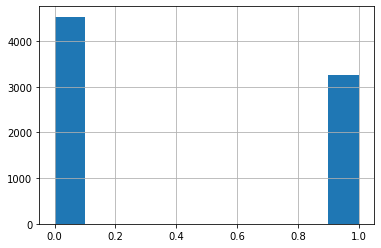

In [ ]:
target=train['Purchase Again']
target.hist()

In [ ]:
  # Time features
all_data["Order Time"]= pd.to_datetime(all_data["Order Time"])  #Convert argument to datetime
all_data["dayofweek"]= all_data["Order Time"].dt.dayofweek  #used to get the day of the week
all_data["hour"]= all_data["Order Time"].dt.hour  #used to get the hour
all_data["day od month"]= all_data["Order Time"].dt.day #used to get the day of the month
  # Hour bins
hour_bins = [0, 6, 11, 15, 18, 24]
dispatch_hour_bin = pd.cut(all_data.hour, hour_bins, right=False)  #Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable.
all_data['hour_bin'] = dispatch_hour_bin

   

In [ ]:

all_data['week-end']=np.where(np.logical_or(all_data['dayofweek']==5,all_data['dayofweek']==4),1,0)

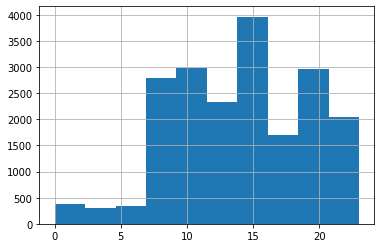

In [ ]:
all_data['hour'].hist()

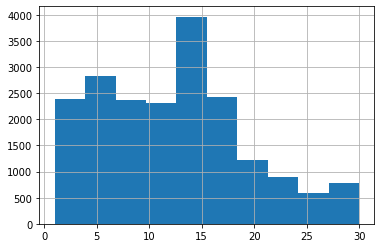

In [ ]:
all_data['day od month'].hist()

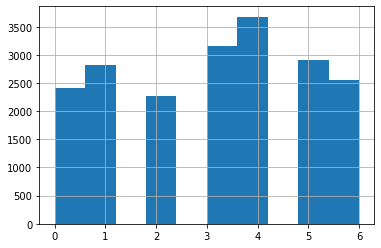

In [ ]:
all_data['dayofweek'].hist()

In [ ]:
  # Cyclicale time features
all_data['day od month sin'] = np.sin(all_data['day od month']*(2.*np.pi/31)) 
all_data['day od month cos'] = np.cos(all_data['day od month']*(2.*np.pi/31)) 
all_data['dayofweek sin'] = np.sin(all_data['dayofweek']*(2.*np.pi/7)) 
all_data['dayofweek cos'] = np.cos(all_data['dayofweek']*(2.*np.pi/7)) 
all_data['hour sin'] = np.sin(all_data['hour']*(2.*np.pi/23)) 
all_data['hour cos'] = np.cos(all_data['hour']*(2.*np.pi/23))


In [ ]:
#Supprimer la colonne "Order Time"
all_data.drop('Order Time',axis=1)

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,...,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos
0,8236617,DEFAULT,Promotions,03 fardeaux Ifri + 1 offert,30,480.0,14400.0,43650.0,200200.0,CASH_PAY,...,0.0,1.0,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000
1,8236617,DEFAULT,Promotions,3 fardeaux coca achetes = 1 fardeau offert,15,1800.0,27000.0,43650.0,200200.0,CASH_PAY,...,0.0,1.0,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000
2,8236617,DEFAULT,Promotions,Snickers mini cube 200g,5,450.0,2250.0,43650.0,200200.0,CASH_PAY,...,0.0,1.0,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000
3,8236624,COMPLETED,Paves,Pave chocolat,3,100.0,300.0,1460.0,700700.0,CARD_PAY,...,0.0,1.0,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000
4,8236624,COMPLETED,Tartes,Tarte citron,3,100.0,300.0,1460.0,700700.0,CARD_PAY,...,0.0,1.0,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12008,1395694909,REJECTED,Huiles,Elio 5l,5,600.0,3000.0,3000.0,200200.0,CASH_PAY,...,18.0,14.0,"[18, 24)",0,0.299363,-0.954139,-0.781831,0.623490,-9.790841e-01,0.203456
12009,3266630982,COMPLETED,NaN,Oeuf Au Chocolat Kinder Joy Boy pour GarÃ§ons ...,1,220.0,220.0,1100.0,200200.0,CARD_PAY,...,20.0,14.0,"[18, 24)",0,0.299363,-0.954139,-0.781831,0.623490,-7.308360e-01,0.682553
12010,3266630982,COMPLETED,NaN,Oeuf Au Chocolat Kinder Joy Girl pour Filles +...,4,220.0,880.0,1100.0,200200.0,CARD_PAY,...,20.0,14.0,"[18, 24)",0,0.299363,-0.954139,-0.781831,0.623490,-7.308360e-01,0.682553
12011,14338798234,REJECTED,Cartouche,Pack PG445 / CL446,1,5150.0,5150.0,5150.0,200200.0,CASH_PAY,...,22.0,14.0,"[18, 24)",0,0.299363,-0.954139,-0.781831,0.623490,-2.697968e-01,0.962917


In [ ]:

all_data['Unit Price'] = pd.to_numeric(all_data['Unit Price'], errors='coerce')
all_data['Total Price']=all_data['Quantity']*all_data['Unit Price']  #Recompute Total Price, from "Unit Price" and "quantity" columns

#Supprimer les colonnes "Sub Total" & "Category Name"
all_data=all_data.drop('Sub Total',axis=1)
all_data=all_data.drop('Category Name',axis=1)

In [ ]:
data_joint = all_data.groupby('Order ID').agg({
    
    'Total Price': 'sum'

})

In [ ]:
data_joint['Sub Total']=data_joint['Total Price']

data_joint=data_joint.drop('Total Price',axis=1)

In [ ]:
all_data.head(-5)

,Order ID,Order Status,Product Name,Quantity,Unit Price,Total Price,Delivery Charge,Payment Method,Customer ID,Merchant,...,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos
0,8236617,DEFAULT,03 fardeaux Ifri + 1 offert,30,480.0,14400.0,200200.0,CASH_PAY,8.392354e+06,6158523.0,...,0.0,1.0,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000,1.000000
1,8236617,DEFAULT,3 fardeaux coca achetes = 1 fardeau offert,15,1800.0,27000.0,200200.0,CASH_PAY,8.392354e+06,6158523.0,...,0.0,1.0,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000,1.000000
2,8236617,DEFAULT,Snickers mini cube 200g,5,450.0,2250.0,200200.0,CASH_PAY,8.392354e+06,6158523.0,...,0.0,1.0,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000,1.000000
3,8236624,COMPLETED,Pave chocolat,3,100.0,300.0,700700.0,CARD_PAY,6.359544e+06,17654385.0,...,0.0,1.0,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000,1.000000
4,8236624,COMPLETED,Tarte citron,3,100.0,300.0,700700.0,CARD_PAY,6.359544e+06,17654385.0,...,0.0,1.0,"[0, 6)",1,0.201299,0.979530,-0.433884,-0.900969,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,23500862814,COMPLETED,Skin Detox Masque Argile Purifiant 2-en-1 - 15...,1,950.0,950.0,390390.0,CARD_PAY,4.515537e+09,19380165.0,...,17.0,14.0,"[15, 18)",0,0.299363,-0.954139,-0.781831,0.623490,-0.997669,-0.068242
12004,23500862814,COMPLETED,Savon CrÃ¨me Soft - 100g - Blanc,1,174.0,174.0,390390.0,CARD_PAY,4.515537e+09,19380165.0,...,17.0,14.0,"[15, 18)",0,0.299363,-0.954139,-0.781831,0.623490,-0.997669,-0.068242
12005,23500862814,COMPLETED,Bic Comfort 2 Sensitive - Lot De 6 Rasoirs Jet...,1,230.0,230.0,390390.0,CARD_PAY,4.515537e+09,19380165.0,...,17.0,14.0,"[15, 18)",0,0.299363,-0.954139,-0.781831,0.623490,-0.997669,-0.068242
12006,6176711011,COMPLETED,03 Fardeaux Ifri + 1 Offert,3,480.0,1440.0,200200.0,CASH_PAY,6.296932e+06,23255526.0,...,17.0,14.0,"[15, 18)",0,0.299363,-0.954139,-0.781831,0.623490,-0.997669,-0.068242


In [ ]:
data_joint

,Sub Total
Order ID,
8236617,43650.0
8236624,1460.0
8236741,4740.0
8236744,3750.0
8236772,1800.0
...,...
51088700000000,487.5
53243700000000,1200.0
69827300000000,1200.0


In [ ]:
all_data = all_data.merge(data_joint ,on='Order ID', how = 'inner')  #utilisé pour fusionner les deux moitiés "all_data" & "data_joint"

In [ ]:
#Supprimer les colonnes "Product Name" & "Unit Price"

all_data=all_data.drop('Product Name',axis=1)
all_data=all_data.drop('Unit Price',axis=1)


In [ ]:
#Customer Country : Since the 'Customer Country' feature has only 0.3% missing values, we will just fill these with the most common one which is "Algeria"
common_value = 'Algeria'
data = [all_data]
for dataset in data:
    dataset['Customer Country'] = dataset['Customer Country'].fillna(common_value)

#Delivery Charge : Since the 'Delivery Charge' feature has only 0.1% missing values, we will just fill these with the most common one which is "200200"
common_value = 200200
data = [all_data]

for dataset in data:
    dataset['Delivery Charge'] = dataset['Delivery Charge'].fillna(common_value)


In [ ]:
#Payment Method : Since the 'Payment Method' feature has only 1.8% missing values, we will just fill these with the most common one which is "CARD_PAY"
common_value = 'CARD_PAY'
data=[all_data]
for dataset in data:
    dataset['Payment Method'] = dataset['Payment Method'].fillna(common_value)

In [ ]:
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster
from sklearn import metrics

In [ ]:
#Changer le type de variable de object à int pour que le modèle puisse les comprendre

categorical_variables = ['hour_bin','Payment Method','Order Status','Customer Country','Delivery Charge']

le = preprocessing.LabelEncoder()

for var in categorical_variables:
  categories = all_data[var]
  all_data[var] = le.fit_transform(categories)


In [ ]:
all_data['Delivery Charge'].fillna(value=200200.00,inplace=True)
all_data['Customer Country'].fillna(value=0,inplace=True)


In [ ]:
#Supprimer la colonne "Order Time"

all_data=all_data.drop('Order Time',axis=1)

In [ ]:
all_data

,Order ID,Order Status,Quantity,Total Price,Delivery Charge,Payment Method,Customer ID,Merchant,Customer Country,Purchase Again,...,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Sub Total
0,8236617,3,30,14400.0,3,2,8.392354e+06,6.158523e+06,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,43650.0
1,8236617,3,15,27000.0,3,2,8.392354e+06,6.158523e+06,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,43650.0
2,8236617,3,5,2250.0,3,2,8.392354e+06,6.158523e+06,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,43650.0
3,8236624,2,3,300.0,24,0,6.359544e+06,1.765438e+07,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,1460.0
4,8236624,2,3,300.0,24,0,6.359544e+06,1.765438e+07,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,1460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19807,1395694909,4,5,3000.0,3,2,4.949852e+06,2.325553e+07,0,NaN,...,14.0,4,0,0.299363,-0.954139,-0.781831,0.623490,-9.790841e-01,0.203456,3000.0
19808,3266630982,2,1,220.0,3,0,6.313937e+09,1.058635e+07,0,NaN,...,14.0,4,0,0.299363,-0.954139,-0.781831,0.623490,-7.308360e-01,0.682553,1100.0
19809,3266630982,2,4,880.0,3,0,6.313937e+09,1.058635e+07,0,NaN,...,14.0,4,0,0.299363,-0.954139,-0.781831,0.623490,-7.308360e-01,0.682553,1100.0
19810,14338798234,4,1,5150.0,3,2,7.734230e+06,1.470094e+07,0,NaN,...,14.0,4,0,0.299363,-0.954139,-0.781831,0.623490,-2.697968e-01,0.962917,5150.0


#SPLIT DATA

In [ ]:
n_train = train.shape[0]
n_test = test.shape[0]

train_set = all_data[:n_train]
test_set = all_data[n_train:]


In [ ]:
n_train

7799

In [ ]:
train_set

,Order ID,Order Status,Quantity,Total Price,Delivery Charge,Payment Method,Customer ID,Merchant,Customer Country,Purchase Again,...,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Sub Total
0,8236617,3,30,14400.0,3,2,8392354.0,6158523.0,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.00000,1.00000,43650.0
1,8236617,3,15,27000.0,3,2,8392354.0,6158523.0,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.00000,1.00000,43650.0
2,8236617,3,5,2250.0,3,2,8392354.0,6158523.0,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.00000,1.00000,43650.0
3,8236624,2,3,300.0,24,0,6359544.0,17654385.0,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.00000,1.00000,1460.0
4,8236624,2,3,300.0,24,0,6359544.0,17654385.0,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.00000,1.00000,1460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,2920881344,2,4,400.0,62,0,8387786.0,17654385.0,0,0.0,...,18.0,3,0,-0.485302,-0.874347,0.000000,1.000000,-0.81697,-0.57668,2120.0
7795,2920881344,2,4,400.0,62,0,8387786.0,17654385.0,0,0.0,...,18.0,3,0,-0.485302,-0.874347,0.000000,1.000000,-0.81697,-0.57668,2120.0
7796,2920881344,2,4,400.0,62,0,8387786.0,17654385.0,0,0.0,...,18.0,3,0,-0.485302,-0.874347,0.000000,1.000000,-0.81697,-0.57668,2120.0
7797,2920881344,2,2,240.0,62,0,8387786.0,17654385.0,0,0.0,...,18.0,3,0,-0.485302,-0.874347,0.000000,1.000000,-0.81697,-0.57668,2120.0


In [ ]:
test_set=test_set.drop('Purchase Again',axis=1)

In [ ]:
test_set

,Order ID,Order Status,Quantity,Total Price,Delivery Charge,Payment Method,Customer ID,Merchant,Customer Country,dayofweek,...,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Sub Total
7799,8236741,2,2,2780.0,17,0,8.392444e+06,7.225386e+06,0,4.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,4740.0
7800,8236741,2,1,210.0,17,0,8.392444e+06,7.225386e+06,0,4.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,4740.0
7801,8236741,2,1,210.0,17,0,8.392444e+06,7.225386e+06,0,4.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,4740.0
7802,8236741,2,1,900.0,17,0,8.392444e+06,7.225386e+06,0,4.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,4740.0
7803,8236741,2,2,340.0,17,0,8.392444e+06,7.225386e+06,0,4.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,4740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19807,1395694909,4,5,3000.0,3,2,4.949852e+06,2.325553e+07,0,6.0,...,14.0,4,0,0.299363,-0.954139,-0.781831,0.623490,-9.790841e-01,0.203456,3000.0
19808,3266630982,2,1,220.0,3,0,6.313937e+09,1.058635e+07,0,6.0,...,14.0,4,0,0.299363,-0.954139,-0.781831,0.623490,-7.308360e-01,0.682553,1100.0
19809,3266630982,2,4,880.0,3,0,6.313937e+09,1.058635e+07,0,6.0,...,14.0,4,0,0.299363,-0.954139,-0.781831,0.623490,-7.308360e-01,0.682553,1100.0
19810,14338798234,4,1,5150.0,3,2,7.734230e+06,1.470094e+07,0,6.0,...,14.0,4,0,0.299363,-0.954139,-0.781831,0.623490,-2.697968e-01,0.962917,5150.0


In [ ]:
#Réduire la taille du set : 1st Groupeby

Customer_Table_Train = train_set.groupby('Customer ID').agg({
     'Order ID': 'count',
    'Total Price': 'sum',
  
})

Customer_Table_Test = test_set.groupby('Customer ID').agg({
     'Order ID': 'count',
    'Total Price': 'sum',
  
})

In [ ]:
Customer_Table_Train

,Order ID,Total Price
Customer ID,,
1.755078e+06,3,1625.0
1.755834e+06,5,3165.0
1.808460e+06,20,8128.0
1.823292e+06,11,3364.0
1.857918e+06,2,1920.0
...,...,...
7.552692e+10,44,9325.0
8.363633e+10,3,2850.0
1.463152e+11,3,5100.0


In [ ]:
Customer_Table_Test

,Order ID,Total Price
Customer ID,,
1.786544e+06,3,31914.0
1.790392e+06,6,2260.0
1.792674e+06,8,8360.0
1.806334e+06,4,3876.0
1.814650e+06,2,1696.0
...,...,...
1.122027e+11,4,5327.5
1.258333e+11,42,16667.0
1.100000e+12,1,996.0


In [ ]:
Customer_Table_Train['Frequency']=Customer_Table_Train['Order ID']
Customer_Table_Test['Frequency']=Customer_Table_Test['Order ID']
Customer_Table_Train['All_money_spent']=Customer_Table_Train['Total Price']
Customer_Table_Test['All_money_spent']=Customer_Table_Test['Total Price']


In [ ]:
Customer_Table_Train

,Order ID,Total Price,Frequency,All_money_spent
Customer ID,,,,
1.755078e+06,3,1625.0,3,1625.0
1.755834e+06,5,3165.0,5,3165.0
1.808460e+06,20,8128.0,20,8128.0
1.823292e+06,11,3364.0,11,3364.0
1.857918e+06,2,1920.0,2,1920.0
...,...,...,...,...
7.552692e+10,44,9325.0,44,9325.0
8.363633e+10,3,2850.0,3,2850.0
1.463152e+11,3,5100.0,3,5100.0


In [ ]:
Customer_Table_Test

,Order ID,Total Price,Frequency,All_money_spent
Customer ID,,,,
1.786544e+06,3,31914.0,3,31914.0
1.790392e+06,6,2260.0,6,2260.0
1.792674e+06,8,8360.0,8,8360.0
1.806334e+06,4,3876.0,4,3876.0
1.814650e+06,2,1696.0,2,1696.0
...,...,...,...,...
1.122027e+11,4,5327.5,4,5327.5
1.258333e+11,42,16667.0,42,16667.0
1.100000e+12,1,996.0,1,996.0


In [ ]:
Customer_Table_Test=Customer_Table_Test.drop('Order ID',axis=1)
Customer_Table_Train=Customer_Table_Train.drop('Order ID',axis=1)
Customer_Table_Test=Customer_Table_Test.drop('Total Price',axis=1)
Customer_Table_Train=Customer_Table_Train.drop('Total Price',axis=1)

#Frequency + all_money_spend

In [ ]:
Customer_Table_Test

,Frequency,All_money_spent
Customer ID,,
1.786544e+06,3,31914.0
1.790392e+06,6,2260.0
1.792674e+06,8,8360.0
1.806334e+06,4,3876.0
1.814650e+06,2,1696.0
...,...,...
1.122027e+11,4,5327.5
1.258333e+11,42,16667.0
1.100000e+12,1,996.0


In [ ]:
Customer_Table_Train

,Frequency,All_money_spent
Customer ID,,
1.755078e+06,3,1625.0
1.755834e+06,5,3165.0
1.808460e+06,20,8128.0
1.823292e+06,11,3364.0
1.857918e+06,2,1920.0
...,...,...
7.552692e+10,44,9325.0
8.363633e+10,3,2850.0
1.463152e+11,3,5100.0


#Quantiy + time 

In [ ]:
train_set

,Order ID,Order Status,Quantity,Total Price,Delivery Charge,Payment Method,Customer ID,Merchant,Customer Country,Purchase Again,...,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Sub Total
0,8236617,3,30,14400.0,3,2,8392354.0,6158523.0,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.00000,1.00000,43650.0
1,8236617,3,15,27000.0,3,2,8392354.0,6158523.0,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.00000,1.00000,43650.0
2,8236617,3,5,2250.0,3,2,8392354.0,6158523.0,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.00000,1.00000,43650.0
3,8236624,2,3,300.0,24,0,6359544.0,17654385.0,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.00000,1.00000,1460.0
4,8236624,2,3,300.0,24,0,6359544.0,17654385.0,0,1.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.00000,1.00000,1460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,2920881344,2,4,400.0,62,0,8387786.0,17654385.0,0,0.0,...,18.0,3,0,-0.485302,-0.874347,0.000000,1.000000,-0.81697,-0.57668,2120.0
7795,2920881344,2,4,400.0,62,0,8387786.0,17654385.0,0,0.0,...,18.0,3,0,-0.485302,-0.874347,0.000000,1.000000,-0.81697,-0.57668,2120.0
7796,2920881344,2,4,400.0,62,0,8387786.0,17654385.0,0,0.0,...,18.0,3,0,-0.485302,-0.874347,0.000000,1.000000,-0.81697,-0.57668,2120.0
7797,2920881344,2,2,240.0,62,0,8387786.0,17654385.0,0,0.0,...,18.0,3,0,-0.485302,-0.874347,0.000000,1.000000,-0.81697,-0.57668,2120.0


In [ ]:
test_set

,Order ID,Order Status,Quantity,Total Price,Delivery Charge,Payment Method,Customer ID,Merchant,Customer Country,dayofweek,...,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Sub Total
7799,8236741,2,2,2780.0,17,0,8.392444e+06,7.225386e+06,0,4.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,4740.0
7800,8236741,2,1,210.0,17,0,8.392444e+06,7.225386e+06,0,4.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,4740.0
7801,8236741,2,1,210.0,17,0,8.392444e+06,7.225386e+06,0,4.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,4740.0
7802,8236741,2,1,900.0,17,0,8.392444e+06,7.225386e+06,0,4.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,4740.0
7803,8236741,2,2,340.0,17,0,8.392444e+06,7.225386e+06,0,4.0,...,1.0,0,1,0.201299,0.979530,-0.433884,-0.900969,0.000000e+00,1.000000,4740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19807,1395694909,4,5,3000.0,3,2,4.949852e+06,2.325553e+07,0,6.0,...,14.0,4,0,0.299363,-0.954139,-0.781831,0.623490,-9.790841e-01,0.203456,3000.0
19808,3266630982,2,1,220.0,3,0,6.313937e+09,1.058635e+07,0,6.0,...,14.0,4,0,0.299363,-0.954139,-0.781831,0.623490,-7.308360e-01,0.682553,1100.0
19809,3266630982,2,4,880.0,3,0,6.313937e+09,1.058635e+07,0,6.0,...,14.0,4,0,0.299363,-0.954139,-0.781831,0.623490,-7.308360e-01,0.682553,1100.0
19810,14338798234,4,1,5150.0,3,2,7.734230e+06,1.470094e+07,0,6.0,...,14.0,4,0,0.299363,-0.954139,-0.781831,0.623490,-2.697968e-01,0.962917,5150.0


In [ ]:
Customer_Table_Train_2 = train_set.groupby('Customer ID').agg({
     'Quantity': 'sum',
    'dayofweek': 'mean',
    'hour': 'mean',
    'day od month': 'mean',
    'hour_bin': 'mean',
    'week-end': 'mean',
    'day od month sin': 'mean',
    'day od month cos': 'mean',
    'dayofweek sin': 'mean',
    'dayofweek cos': 'mean',
    'hour sin': 'mean',
    'hour cos': 'mean',
    'day od month sin': 'mean',
    'Purchase Again' : 'max',
    'Payment Method':'mean',
 
})

Customer_Table_Test_2 = test_set.groupby('Customer ID').agg({
    'Quantity': 'sum',
    'dayofweek': 'mean',
    'hour': 'mean',
    'day od month': 'mean',
    'hour_bin': 'mean',
    'week-end': 'mean',
    'day od month sin': 'mean',
    'day od month cos': 'mean',
    'dayofweek sin': 'mean',
    'dayofweek cos': 'mean',
    'hour sin': 'mean',
    'hour cos': 'mean',
    'day od month sin': 'mean',
    'Payment Method':'mean',

})

In [ ]:
Customer_Table_Test_2

,Quantity,dayofweek,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Payment Method
Customer ID,,,,,,,,,,,,,
1.786544e+06,106,5.000000,1.666667,6.000000,0.000000,1.000000,0.937752,0.347305,-0.974928,-0.222521,0.436322,0.890585,2.0
1.790392e+06,7,3.333333,7.833333,12.666667,1.000000,0.833333,0.117857,-0.665803,-0.361570,-0.584141,0.837852,-0.536380,2.0
1.792674e+06,40,3.500000,13.500000,12.000000,2.250000,0.250000,0.285389,-0.332438,-0.330719,0.125000,-0.461421,-0.772991,2.0
1.806334e+06,10,3.500000,12.250000,12.000000,2.000000,0.750000,0.123881,-0.044302,-0.265216,-0.350242,0.375077,-0.295282,2.0
1.814650e+06,6,2.000000,15.000000,3.000000,3.000000,0.000000,0.571268,0.820763,0.974928,-0.222521,-0.816970,-0.576680,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.122027e+11,12,0.000000,10.000000,8.000000,1.000000,0.000000,0.998717,-0.050649,0.000000,1.000000,0.398401,-0.917211,0.0
1.258333e+11,73,4.976190,10.380952,17.833333,1.404762,0.619048,0.111857,-0.556268,-0.682373,-0.174841,0.271722,-0.873980,0.0
1.100000e+12,4,6.000000,14.000000,7.000000,2.000000,0.000000,0.988468,0.151428,-0.781831,0.623490,-0.631088,-0.775711,2.0


In [ ]:
Customer_Table_Train_2

,Quantity,dayofweek,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Purchase Again,Payment Method
Customer ID,,,,,,,,,,,,,,
1.755078e+06,4,0.000000,12.000000,18.000000,2.0,0.000000,-4.853020e-01,-0.874347,0.000000,1.000000,-0.136167,-0.990686,0.0,2.0
1.755834e+06,7,2.200000,13.200000,10.400000,2.2,0.000000,7.197826e-01,-0.440919,0.719891,-0.324698,-0.372871,-0.616172,1.0,1.8
1.808460e+06,60,6.000000,8.000000,3.000000,1.0,0.000000,5.712682e-01,0.820763,-0.781831,0.623490,0.816970,-0.576680,0.0,2.0
1.823292e+06,18,2.000000,17.000000,13.000000,3.0,0.000000,4.853020e-01,-0.874347,0.974928,-0.222521,-0.997669,-0.068242,0.0,2.0
1.857918e+06,4,4.500000,12.500000,15.500000,2.0,0.000000,1.387779e-16,-0.954139,-0.173974,-0.138740,-0.267284,-0.953949,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.552692e+10,57,4.000000,12.000000,15.000000,2.0,1.000000,1.011683e-01,-0.994869,-0.433884,-0.900969,-0.136167,-0.990686,0.0,0.0
8.363633e+10,7,3.000000,19.000000,14.000000,4.0,0.000000,2.993631e-01,-0.954139,0.433884,-0.900969,-0.887885,0.460065,0.0,2.0
1.463152e+11,3,3.000000,20.000000,14.000000,4.0,0.000000,2.993631e-01,-0.954139,0.433884,-0.900969,-0.730836,0.682553,1.0,0.0


#Merge the two

In [ ]:
Customer_Table_Train_all = Customer_Table_Train_2.merge(Customer_Table_Train ,on='Customer ID', how = 'inner')
Customer_Table_Test_all = Customer_Table_Test_2.merge(Customer_Table_Test ,on='Customer ID', how = 'inner')


In [ ]:
Customer_Table_Train_all

,Quantity,dayofweek,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Purchase Again,Payment Method,Frequency,All_money_spent
Customer ID,,,,,,,,,,,,,,,,
1.755078e+06,4,0.000000,12.000000,18.000000,2.0,0.000000,-4.853020e-01,-0.874347,0.000000,1.000000,-0.136167,-0.990686,0.0,2.0,3,1625.0
1.755834e+06,7,2.200000,13.200000,10.400000,2.2,0.000000,7.197826e-01,-0.440919,0.719891,-0.324698,-0.372871,-0.616172,1.0,1.8,5,3165.0
1.808460e+06,60,6.000000,8.000000,3.000000,1.0,0.000000,5.712682e-01,0.820763,-0.781831,0.623490,0.816970,-0.576680,0.0,2.0,20,8128.0
1.823292e+06,18,2.000000,17.000000,13.000000,3.0,0.000000,4.853020e-01,-0.874347,0.974928,-0.222521,-0.997669,-0.068242,0.0,2.0,11,3364.0
1.857918e+06,4,4.500000,12.500000,15.500000,2.0,0.000000,1.387779e-16,-0.954139,-0.173974,-0.138740,-0.267284,-0.953949,1.0,2.0,2,1920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.552692e+10,57,4.000000,12.000000,15.000000,2.0,1.000000,1.011683e-01,-0.994869,-0.433884,-0.900969,-0.136167,-0.990686,0.0,0.0,44,9325.0
8.363633e+10,7,3.000000,19.000000,14.000000,4.0,0.000000,2.993631e-01,-0.954139,0.433884,-0.900969,-0.887885,0.460065,0.0,2.0,3,2850.0
1.463152e+11,3,3.000000,20.000000,14.000000,4.0,0.000000,2.993631e-01,-0.954139,0.433884,-0.900969,-0.730836,0.682553,1.0,0.0,3,5100.0


In [ ]:
Customer_Table_Test_all

,Quantity,dayofweek,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Payment Method,Frequency,All_money_spent
Customer ID,,,,,,,,,,,,,,,
1.786544e+06,106,5.000000,1.666667,6.000000,0.000000,1.000000,0.937752,0.347305,-0.974928,-0.222521,0.436322,0.890585,2.0,3,31914.0
1.790392e+06,7,3.333333,7.833333,12.666667,1.000000,0.833333,0.117857,-0.665803,-0.361570,-0.584141,0.837852,-0.536380,2.0,6,2260.0
1.792674e+06,40,3.500000,13.500000,12.000000,2.250000,0.250000,0.285389,-0.332438,-0.330719,0.125000,-0.461421,-0.772991,2.0,8,8360.0
1.806334e+06,10,3.500000,12.250000,12.000000,2.000000,0.750000,0.123881,-0.044302,-0.265216,-0.350242,0.375077,-0.295282,2.0,4,3876.0
1.814650e+06,6,2.000000,15.000000,3.000000,3.000000,0.000000,0.571268,0.820763,0.974928,-0.222521,-0.816970,-0.576680,2.0,2,1696.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.122027e+11,12,0.000000,10.000000,8.000000,1.000000,0.000000,0.998717,-0.050649,0.000000,1.000000,0.398401,-0.917211,0.0,4,5327.5
1.258333e+11,73,4.976190,10.380952,17.833333,1.404762,0.619048,0.111857,-0.556268,-0.682373,-0.174841,0.271722,-0.873980,0.0,42,16667.0
1.100000e+12,4,6.000000,14.000000,7.000000,2.000000,0.000000,0.988468,0.151428,-0.781831,0.623490,-0.631088,-0.775711,2.0,1,996.0


**Magazine FR**

In [ ]:
Customer_Table_Train_all

,Quantity,dayofweek,hour,day od month,hour_bin,week-end,day od month sin,day od month cos,dayofweek sin,dayofweek cos,hour sin,hour cos,Purchase Again,Payment Method,Frequency,All_money_spent
Customer ID,,,,,,,,,,,,,,,,
1.755078e+06,4,0.000000,12.000000,18.000000,2.0,0.000000,-4.853020e-01,-0.874347,0.000000,1.000000,-0.136167,-0.990686,0.0,2.0,3,1625.0
1.755834e+06,7,2.200000,13.200000,10.400000,2.2,0.000000,7.197826e-01,-0.440919,0.719891,-0.324698,-0.372871,-0.616172,1.0,1.8,5,3165.0
1.808460e+06,60,6.000000,8.000000,3.000000,1.0,0.000000,5.712682e-01,0.820763,-0.781831,0.623490,0.816970,-0.576680,0.0,2.0,20,8128.0
1.823292e+06,18,2.000000,17.000000,13.000000,3.0,0.000000,4.853020e-01,-0.874347,0.974928,-0.222521,-0.997669,-0.068242,0.0,2.0,11,3364.0
1.857918e+06,4,4.500000,12.500000,15.500000,2.0,0.000000,1.387779e-16,-0.954139,-0.173974,-0.138740,-0.267284,-0.953949,1.0,2.0,2,1920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.552692e+10,57,4.000000,12.000000,15.000000,2.0,1.000000,1.011683e-01,-0.994869,-0.433884,-0.900969,-0.136167,-0.990686,0.0,0.0,44,9325.0
8.363633e+10,7,3.000000,19.000000,14.000000,4.0,0.000000,2.993631e-01,-0.954139,0.433884,-0.900969,-0.887885,0.460065,0.0,2.0,3,2850.0
1.463152e+11,3,3.000000,20.000000,14.000000,4.0,0.000000,2.993631e-01,-0.954139,0.433884,-0.900969,-0.730836,0.682553,1.0,0.0,3,5100.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Customer_Table_Train_all[['All_money_spent']] = scaler.fit_transform(Customer_Table_Train_all[['All_money_spent']])

Customer_Table_Test_all[['All_money_spent']] = scaler.fit_transform(Customer_Table_Test_all[['All_money_spent']])

In [ ]:
joint_MT=train_set[['Customer ID','Merchant']].drop_duplicates(keep=False)
joint_MTest=test_set[['Customer ID','Merchant']].drop_duplicates(keep=False)

In [ ]:
joint_MTest.loc[joint_MTest['Customer ID']==1790392]

,Customer ID,Merchant
17184,1790392.0,8069691.0


In [ ]:
MAG_FR_T = joint_MT.groupby('Customer ID').agg({
    'Merchant': 'count',
})

MAG_FR_Test = joint_MTest.groupby('Customer ID').agg({
    'Merchant': 'count',
})

In [ ]:
Customer_Table_Train_all_all = Customer_Table_Train_all.merge(MAG_FR_T ,on='Customer ID', how = 'inner')
Customer_Table_Test_all_all = Customer_Table_Test_all.merge(MAG_FR_Test ,on='Customer ID', how = 'inner')

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
# Fitting the data to model
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import ensemble

import xgboost as xgb
import lightgbm as lgb
import catboost as ctb

from sklearn.metrics import mean_squared_error


from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold


In [ ]:
X=Customer_Table_Train_all.drop('Purchase Again',axis=1)
Y=Customer_Table_Train_all['Purchase Again']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBRegressor

parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1,0.05,0.01], 
              'max_depth': [7,10,15,20],
              'min_child_weight': [10,15,20,25],
              'colsample_bytree': [0.8, 0.9, 1],
              'n_estimators': [300,400,500,600],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [1,2,3]}

xgb_model = XGBRegressor(random_state=30)

grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters, cv=5,n_iter=100,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
grid_obj_xgb.fit(x_train, y_train,verbose = 1)

y_pred_train = grid_obj_xgb.predict(x_train)
y_pred_test = grid_obj_xgb.predict(x_test)
submission.Target =  grid_obj_xgb.predict(Customer_Table_Test_all)
err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


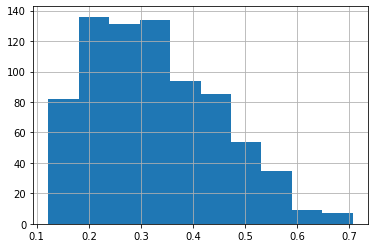

In [ ]:
submission.Target.hist()

In [ ]:
submission.to_csv("mm.csv",index=False)